# Shooting Method for Solving SE

We are going to solve the Schrodinger Equation numerically to find the energy eigenstates and energy eigenvalues for various potential energy functions. In this case, we will use an finite square well. We will use a method called the shooting method. You will manually adjust the energy eigenvalue $E$ until the wavefunction meets the boundary conditions.

In [1]:
#import packages
import matplotlib.pyplot as plt #used for graphing
from numpy import arange, pi, sqrt

In [2]:
#show graphs inline (do not use for print publication quality graphs)
%matplotlib inline

## Generate and Plot V(x)

In [3]:
#x is in nm and E is in eV
E_rest=0.511e6
hc=1240

#values of x
N=1000

#left edge
x_left=-1

#right edge
x_right=1

#dx
dx=(x_right-x_left)/N

#Calculate V(x)
xdata=[]
V=[]
Vmax=10

for x in arange(x_left,x_right,dx):
    leftWall=-0.5
    rightWall=0.5
    xdata.append(x)
    if(x<leftWall):
        V.append(Vmax)
    elif(x>rightWall):
        V.append(Vmax)
    else:
        V.append(0)

print("number of data points for x=",len(xdata))

number of data points for x= 1000


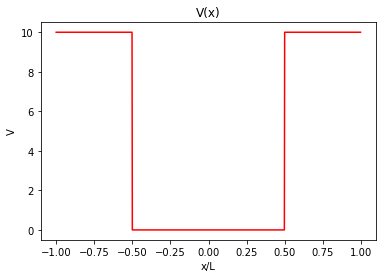

In [4]:
#Graph V(x)
plt.plot(xdata,V,'r') #plot V(x)
plt.xlabel('x/L')
plt.ylabel('V')
plt.title("V(x)")
plt.show()

## Guess Values of Psi(x_0) and Psi(x_1) and E

In [5]:
#guess at energy eigenvalue
#E=hc*hc/8/E_rest/1 #ground state for infinite well with L=1 nm
#E=0.9611825 #ground state for L=0.5
#E=0.29766 #ground state for L=1
E=1.1865 #first excited state for L=1
#E=2.6525#second excited state for L=1

#guess at starting values at x_0 and x_1
Psi_0=0
Psi_1=1e-5

In [6]:
#Define and calculate Psi
Psi=[] #list of psi(x)
i=0
for x in xdata:
    if(i==0):
        Psi.append(Psi_0)
    elif(i==1):
        Psi.append(Psi_1)
    else:
        #f is psi[i]
        f=2*Psi[i-1]-Psi[i-2]-8*pi*pi*E_rest/(hc*hc)*dx*dx*(E-V[i-1])*Psi[i-1]
        Psi.append(f)
    i=i+1


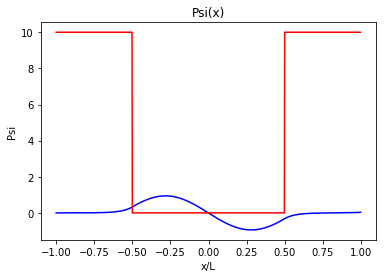

In [7]:
#graph psi
plt.plot(xdata,Psi,'b') #plot Psi(x)
plt.plot(xdata,V,'r') #plot V(x)
plt.xlabel('x/L')
plt.ylabel('Psi')
plt.title("Psi(x)")
plt.show()

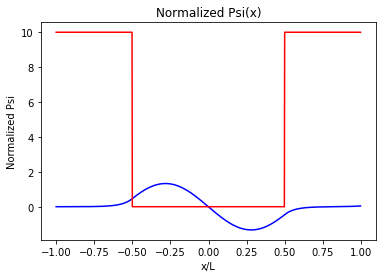

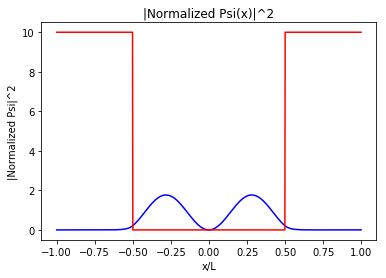

The integral of |normalized psi|^2 from xmin to xmax is  1.0


In [8]:
#find the integral of Psi^2 dx
integral=0
for psi in Psi:
    integral=integral+psi*psi*dx

#calculate the constant A^2 that normalizes the integral of Psi^2 dx
Asquared=1/integral
A=sqrt(Asquared)

#calculate the normalized Psi
PsiNormalized=[]
PsiNormalizedSquared=[]
for j in arange(0,len(Psi),1):
    PsiNormalized.append(A*Psi[j])
    PsiNormalizedSquared.append((A*Psi[j])**2)

#graph the normalized Psi
plt.plot(xdata,PsiNormalized,'b') #plot PsiNormalized(x)
plt.plot(xdata,V,'r') #plot V(x)
plt.xlabel('x/L')
plt.ylabel('Normalized Psi')
plt.title("Normalized Psi(x)")
plt.show()

#graph the normalized Psi^2
plt.plot(xdata,PsiNormalizedSquared,'b') #plot PsiNormalized(x)
plt.plot(xdata,V,'r') #plot V(x)
plt.xlabel('x/L')
plt.ylabel('|Normalized Psi|^2')
plt.title("|Normalized Psi(x)|^2")
plt.show()


#find the integral of Normalized Psi^2 dx and show it is 1
integral=0
for j in arange(0,len(PsiNormalized),1):
    integral=integral+PsiNormalized[j]*PsiNormalized[j]*dx

#print integral
print("The integral of |normalized psi|^2 from xmin to xmax is ",integral)
